In [1]:
import os.path

import numpy as np
import torch
import pandas as pd
from transformers import AutoTokenizer
from transformers import BertModel
import matplotlib.pyplot as plt

## Phoenix2014

In [2]:
anno_dir = "../data/phoenix2014/phoenix-2014-multisigner/annotations/manual"

In [3]:
corpus = pd.read_csv(os.path.join(anno_dir, "train.corpus.csv"), sep='|', header=0, index_col='id')
corpus

,folder,signer,annotation
id,,,
01April_2010_Thursday_heute_default-0,01April_2010_Thursday_heute_default-0/1/*.png,Signer04,__ON__ LIEB ZUSCHAUER ABEND WINTER GESTERN loc...
01April_2010_Thursday_heute_default-2,01April_2010_Thursday_heute_default-2/1/*.png,Signer04,loc-WEST WARM loc-WEST BLEIBEN KUEHL
01April_2010_Thursday_heute_default-3,01April_2010_Thursday_heute_default-3/1/*.png,Signer04,KUEHL KUEHL IN-KOMMEND NACHT MINUS loc-MINUS-P...
01April_2010_Thursday_heute_default-4,01April_2010_Thursday_heute_default-4/1/*.png,Signer04,MORGEN TEMPERATUR ACHT BIS DREIZEHN MAXIMAL DR...
01April_2010_Thursday_heute_default-6,01April_2010_Thursday_heute_default-6/1/*.png,Signer04,AUCH SAMSTAG WEST FREUNDLICH IX TROCKEN WEST R...
...,...,...,...
31October_2009_Saturday_tagesschau_default-4,31October_2009_Saturday_tagesschau_default-4/1...,Signer03,__ON__ NORD loc-REGION HEUTE NACHT SCHON WOLKE...
31October_2009_Saturday_tagesschau_default-6,31October_2009_Saturday_tagesschau_default-6/1...,Signer03,__ON__ AUCH STURM WEHEN WEHEN NORD SEE STURM l...
31October_2009_Saturday_tagesschau_default-10,31October_2009_Saturday_tagesschau_default-10/...,Signer03,__ON__ MORGEN loc-SECHS GRAD loc-SIEBENZEHN GR...


In [4]:
tokenizer = AutoTokenizer.from_pretrained(
    "../.cache/huggingface/bert-base-german-dbmdz-uncased",
    clean_up_tokenization_spaces=True
)
tokenizer.vocab_size

31102

In [5]:
model = BertModel.from_pretrained("../.cache/huggingface/bert-base-german-dbmdz-uncased")
model.config

BertConfig {
  "_name_or_path": "../.cache/huggingface/bert-base-german-dbmdz-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.44.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 31102
}

In [6]:
tokenizer.tokenize(corpus.annotation.iloc[0])

['_',
 '_',
 'on',
 '_',
 '_',
 'lieb',
 'zuschauer',
 'abend',
 'winter',
 'gestern',
 'loc',
 '-',
 'nord',
 'schottland',
 'loc',
 '-',
 'region',
 'ueber',
 '##schwe',
 '##mm',
 '##ung',
 'amerika',
 'ix']

In [7]:
encoded = tokenizer.encode(corpus.annotation.iloc[0], truncation=True, padding=True, return_tensors='pt')
encoded

tensor([[  102,  2002,  2002,   861,  2002,  2002,  6930,  6090,  2964,  2827,
          6346,  6039,   223,  1230, 15394,  6039,   223,  1391, 23729, 13049,
          1463,   140,  8491, 18676,   103]])

In [8]:
embedding = model(encoded).last_hidden_state
embedding

tensor([[[ 0.4376,  0.2374,  0.8281,  ...,  0.6385, -0.7208,  0.6743],
         [ 0.7768,  0.4676,  1.3692,  ...,  0.4491, -1.0921,  0.2547],
         [ 0.5351,  1.3192,  1.1783,  ..., -0.1320, -0.4861, -0.2992],
         ...,
         [ 0.7865,  1.0695, -0.0125,  ...,  0.6793, -0.7288, -0.0735],
         [ 0.1505,  0.5297,  0.6863,  ...,  0.5957, -1.0238, -0.3550],
         [ 0.8503,  0.5040,  0.7816,  ...,  0.3721, -0.6425,  0.0720]]],
       grad_fn=<NativeLayerNormBackward0>)

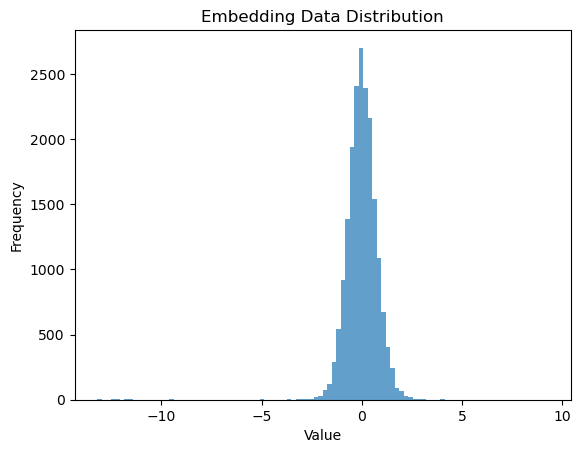

In [9]:
# 直方图查看特性分布
plt.hist(embedding.detach().numpy().flatten(), bins=100, alpha=0.7)
plt.title('Embedding Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [10]:
mean = np.mean(embedding.detach().numpy())
std = np.std(embedding.detach().numpy())
min_val = np.min(embedding.detach().numpy())
max_val = np.max(embedding.detach().numpy())

print(f'Mean: {mean}, Standard Deviation: {std}')
print(f'Minimum: {min_val}, Maximum: {max_val}')


Mean: -0.0018152872798964381, Standard Deviation: 0.8101853728294373
Minimum: -13.198883056640625, Maximum: 9.294820785522461


# CSL Daily

In [11]:
import pickle
import pandas as pd
from transformers import AutoTokenizer

In [7]:
with open("/new_home/xzj23/workspace/SLR/data/csl-daily/sentence_label/csl2020ct_v2.pkl","rb") as f:
    data = pickle.load(f)
data.keys()

dict_keys(['info', 'gloss_map', 'char_map', 'word_map', 'postag_map'])

In [9]:
info = data['info']
info = pd.DataFrame(info)
info

,name,length,label_gloss,label_char,label_word,label_postag,signer,time
0,S000000_P0000_T00,52,"[你们, 好]","[你, 们, 好, ！]","[你们, 好, ！]","[r, a, w]",0,0
1,S000000_P0004_T00,47,"[你们, 好]","[你, 们, 好, ！]","[你们, 好, ！]","[r, a, w]",4,0
2,S000000_P0008_T00,58,"[你们, 好]","[你, 们, 好, ！]","[你们, 好, ！]","[r, a, w]",8,0
3,S000001_P0000_T00,37,[对不起],"[对, 不, 起, ！]","[对不起, ！]","[v, w]",0,0
4,S000001_P0004_T00,33,[对不起],"[对, 不, 起, ！]","[对不起, ！]","[v, w]",4,0
...,...,...,...,...,...,...,...,...
20649,S007410_P0003_T00,65,"[阑尾, 炎, 是, 经常, 看, 病]","[阑, 尾, 炎, 是, 一, 种, 很, 常, 见, 的, 疾, 病, 。]","[阑尾炎, 是, 一, 种, 很, 常见, 的, 疾病, 。]","[n, v, m, q, d, a, u, n, w]",3,0
20650,S007410_P0007_T00,157,"[阑尾, 炎, 是, 经常, 看, 病]","[阑, 尾, 炎, 是, 一, 种, 很, 常, 见, 的, 疾, 病, 。]","[阑尾炎, 是, 一, 种, 很, 常见, 的, 疾病, 。]","[n, v, m, q, d, a, u, n, w]",7,0
20651,S007411_P0000_T00,120,"[阑尾, 炎, 经常, 诱惑, 别, 什么, 病]","[阑, 尾, 炎, 经, 常, 引, 发, 其, 他, 疾, 病, 。]","[阑尾炎, 经常, 引发, 其他, 疾病, 。]","[n, d, v, r, n, w]",0,0
20652,S007411_P0003_T00,81,"[阑尾, 炎, 经常, 诱惑, 别, 什么, 病]","[阑, 尾, 炎, 经, 常, 引, 发, 其, 他, 疾, 病, 。]","[阑尾炎, 经常, 引发, 其他, 疾病, 。]","[n, d, v, r, n, w]",3,0


In [12]:
tokenizer = AutoTokenizer.from_pretrained(
    "../.cache/huggingface/bert-base-chinese",
    clean_up_tokenization_spaces=True
)
tokenizer.vocab_size

21128

In [16]:
encoded = tokenizer.encode(info.label_gloss.iloc[0])
encoded

[101, 872, 812, 102, 1962, 102]

In [17]:
tokenizer.decode(encoded)

'[CLS] 你 们 [SEP] 好 [SEP]'

In [38]:
idx = 1005
gloss = info.label_gloss.iloc[idx]
txt  = ''.join(gloss)
encoded = tokenizer.encode(txt)
decoded = tokenizer.decode(encoded)
print(gloss)
print(txt)
print(encoded)
print(decoded)

['考试', '难', '我', '写', '没有', '好了']
考试难我写没有好了
[101, 5440, 6407, 7410, 2769, 1091, 3766, 3300, 1962, 749, 102]
[CLS] 考 试 难 我 写 没 有 好 了 [SEP]


In [39]:
tokenizer.vocab

{'閨': 7286,
 '含': 1419,
 '戾': 2790,
 'ddd': 13234,
 '讷': 6386,
 '😂': 8104,
 '##交': 13826,
 '##敝': 16195,
 'adsense': 11317,
 '##iko': 11480,
 '##ましょう': 10759,
 'ᆸ': 325,
 '##ｕ': 21098,
 'china': 8873,
 '1280': 10350,
 '瑶': 4457,
 '##ties': 11199,
 '##嘻': 14734,
 '##奥': 15009,
 'α': 210,
 '搀': 3006,
 '鹄': 7899,
 '蓓': 5903,
 '##ture': 11704,
 '##盤': 17733,
 '鑫': 7144,
 '##facebook': 12917,
 '##ndy': 11373,
 '##ほ': 13672,
 '[unused65]': 65,
 '獎': 4354,
 '##嶙': 15383,
 '壆': 1882,
 '粪': 5116,
 '##ータ': 12219,
 'jennifer': 12652,
 '##婷': 15108,
 '##坨': 14846,
 '詛': 6269,
 '跷': 6665,
 '##稲': 17993,
 '卒': 1293,
 '##urg': 13143,
 '##痂': 17623,
 '丽': 714,
 '##姆': 15047,
 '##申': 17566,
 '攥': 3114,
 '暐': 3263,
 '##ious': 11737,
 '##碱': 17879,
 'emc': 12341,
 '##筲': 18094,
 '##菘': 18887,
 '##谊': 19506,
 'javascript': 8561,
 '##腎': 18632,
 'comments': 8616,
 '##τ': 13397,
 '👍': 8102,
 '免': 1048,
 '##ｏ': 9940,
 'g': 149,
 '鯛': 7808,
 'ssh': 11678,
 '射': 2198,
 '##竄': 18042,
 '##膑': 18659,
 '##郊': 2000